# Date : 08/01/2026

# Data Cleaning (Data Cleansing)

Data Cleaning is the process of detecting and correcting (or removing) corrupt, incomplete, duplicate, or irrelevant parts of the data.
* **The Golden Rule:** "Garbage In, Garbage Out." If your data is bad, your Machine Learning model will be bad, no matter how advanced the algorithm is.

## Key Techniques

### 1. Handling Missing Values (Null/NaN)
Data often has gaps (empty cells). You must decide how to handle them:
* **Dropping:** Remove the entire row or column. (Good if dataset is huge and missing data is minimal).
* **Imputation (Filling):** Fill the empty gaps with a calculated value.
    * *Mean/Median:* For numerical data.
    * *Mode:* For categorical (text) data.
    * *Forward/Backward Fill:* Use the previous or next value (common in time-series).

### 2. Removing Duplicates
Duplicate rows can bias your analysis (e.g., counting the same customer twice).
* **Action:** Identify and remove exact duplicates.

### 3. Structural Cleaning (Standardization)
Fixing inconsistencies in typos and naming conventions.
* **Typos:** Correcting "Pyton" to "Python".
* **Capitalization:** Ensuring "India", "india", and "INDIA" are treated as the same category.
* **Inconsistent Categories:** Mapping "NY" and "New York" to a single standard "NY".

### 4. Handling Outliers
Outliers are data points that differ significantly from other observations (e.g., Age = 200).
* **Detection:** Using visualization (Box plots) or math (Z-Score, IQR).
* **Action:** You can remove them (if they are errors) or cap them (if they are extreme but valid).

### 5. Data Type Conversion (Casting)
Ensuring data is stored as the correct type.
* **Example:** A price column stored as a String `"$100"` cannot be calculated. It must be cleaned (remove `$`) and converted to an Integer `100`.



## Summary Table

| Problem | Technique | Example |
| :--- | :--- | :--- |
| **Missing Data** | Imputation | Replace `NaN` with Mean age |
| **Duplicates** | Deduplication | Remove repeated rows |
| **Inconsistent Text** | Standardization | "males" $\to$ "Male" |
| **Wrong Type** | Type Casting | String "2023" $\to$ Int `2023` |
| **Extreme Values** | Outlier Removal | Remove Age > 120 |

In [1]:
import pandas as pd

data = {
    'Region': ['East', 'East', 'West', 'West'],
    'Product' : ['Laptop', 'Tablet', 'Laptop', 'Tablet'],
    'Jan_Sales': [120,80,100,70],
    'Feb_Sales': [135,90,110,85],
    'Mar_Sales': [150,90,120,90]
}

df = pd.DataFrame(data)
df

,Region,Product,Jan_Sales,Feb_Sales,Mar_Sales
0,East,Laptop,120,135,150
1,East,Tablet,80,90,90
2,West,Laptop,100,110,120
3,West,Tablet,70,85,90


In [2]:
# Cleaning
# identifier_cols = ['Region', 'Product']
# measured_values = ['Jan_Sales', 'Feb_Sales', 'Mar_Sales']

df_melted = pd.melt(df, 
                    id_vars=['Region', 'Product'], 
                    value_vars=['Jan_Sales', 'Feb_Sales', 'Mar_Sales'],
                    var_name='Month',
                    value_name='Sales')
df_melted

,Region,Product,Month,Sales
0,East,Laptop,Jan_Sales,120
1,East,Tablet,Jan_Sales,80
2,West,Laptop,Jan_Sales,100
3,West,Tablet,Jan_Sales,70
4,East,Laptop,Feb_Sales,135
5,East,Tablet,Feb_Sales,90
6,West,Laptop,Feb_Sales,110
7,West,Tablet,Feb_Sales,85
8,East,Laptop,Mar_Sales,150
9,East,Tablet,Mar_Sales,90


In [3]:
df_melted['Month'] = df_melted['Month'].str.replace('_Sales', '')
df_melted

,Region,Product,Month,Sales
0,East,Laptop,Jan,120
1,East,Tablet,Jan,80
2,West,Laptop,Jan,100
3,West,Tablet,Jan,70
4,East,Laptop,Feb,135
5,East,Tablet,Feb,90
6,West,Laptop,Feb,110
7,West,Tablet,Feb,85
8,East,Laptop,Mar,150
9,East,Tablet,Mar,90


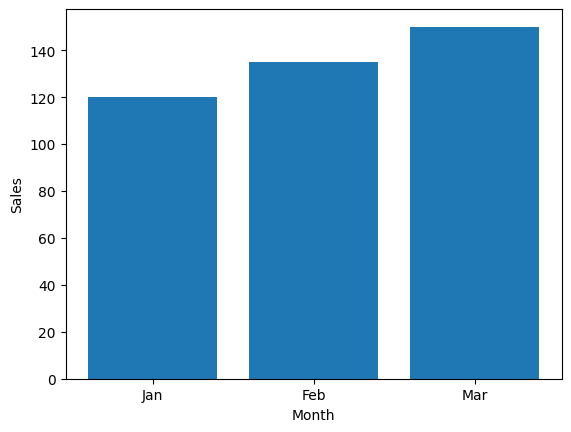

In [4]:
# visiulization

# x= months
# y= sales

# bar graph

import matplotlib.pyplot as plt

plt.bar(df_melted['Month'], df_melted['Sales'])
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

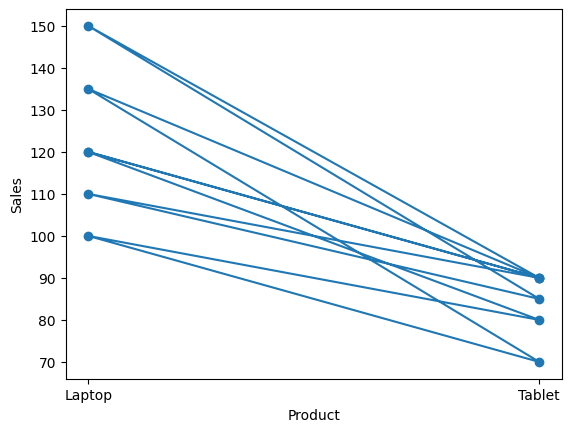

In [5]:
# Line graph

plt.plot(df_melted['Product'], df_melted['Sales'], marker='o')
plt.xlabel('Product')
plt.ylabel('Sales')
plt.show()

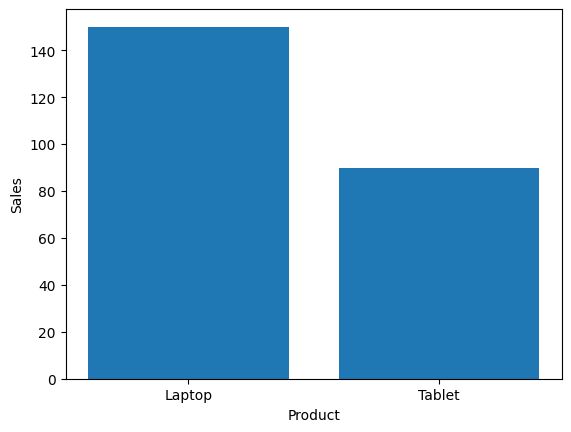

In [6]:
# Line graph

plt.bar(df_melted['Product'], df_melted['Sales'])
plt.xlabel('Product')
plt.ylabel('Sales')
plt.show()

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-02-18/food_consumption.csv'

df = pd.read_csv(url)
df.head()

,country,food_category,consumption,co2_emmission
0,Argentina,Pork,10.51,37.20
1,Argentina,Poultry,38.66,41.53
2,Argentina,Beef,55.48,1712.00
3,Argentina,Lamb & Goat,1.56,54.63
4,Argentina,Fish,4.36,6.96


In [8]:
df.shape

(1430, 4)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1430 entries, 0 to 1429
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        1430 non-null   object 
 1   food_category  1430 non-null   object 
 2   consumption    1430 non-null   float64
 3   co2_emmission  1430 non-null   float64
dtypes: float64(2), object(2)
memory usage: 44.8+ KB


In [10]:
df.isna().sum()

country          0
food_category    0
consumption      0
co2_emmission    0
dtype: int64

In [11]:
# standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

zeroConsumption = df[df['consumption'] == 0]
zeroConsumption

,country,food_category,consumption,co2_emmission
9,Argentina,Soybeans,0.0,0.0
31,Albania,Soybeans,0.0,0.0
264,Kuwait,Pork,0.0,0.0
361,Armenia,Soybeans,0.0,0.0
394,Venezuela,Soybeans,0.0,0.0
438,Croatia,Soybeans,0.0,0.0
471,Paraguay,Soybeans,0.0,0.0
581,Ecuador,Soybeans,0.0,0.0
658,Serbia,Soybeans,0.0,0.0
660,United Arab Emirates,Pork,0.0,0.0


In [12]:
df['co2_per_kg'] = df['co2_emmission'] / df['consumption']
df['co2_per_kg'].fillna(0, inplace=True)

C:\Users\iiiaamnooob\AppData\Local\Temp\ipykernel_28272\739926499.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['co2_per_kg'].fillna(0, inplace=True)


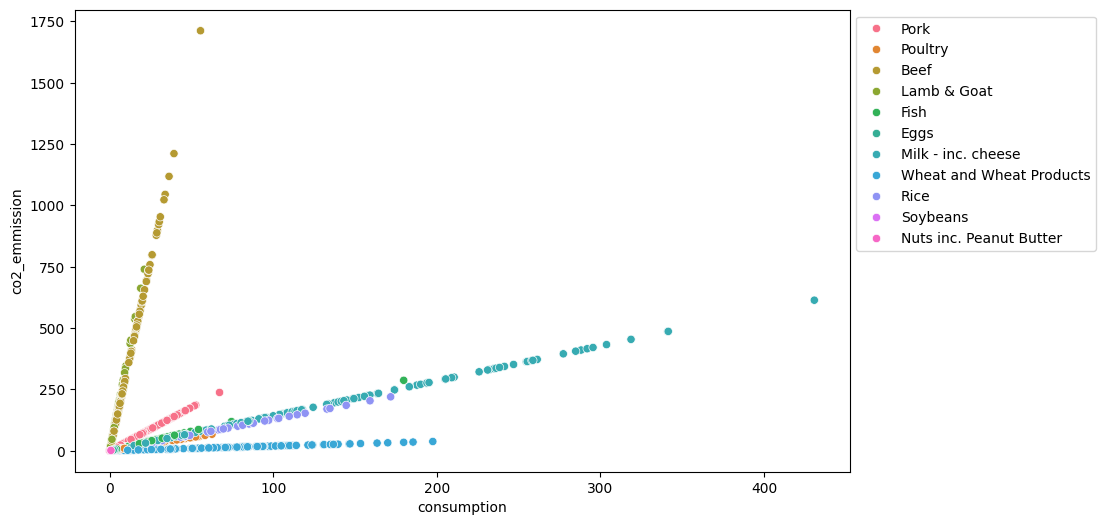

In [13]:
plt.figure(figsize =(10,6))
sns.scatterplot(data=df, x='consumption', y='co2_emmission',hue='food_category')
plt.legend(loc=2, bbox_to_anchor=(1,1))
plt.show()

# Time Series Data

Time series data is a sequence of data points collected or recorded at specific time intervals (e.g., daily stock prices, monthly rainfall, hourly server load).

Analysis of time series generally involves **Decomposition**, which breaks the data down into 5 fundamental components.



## 1. Level
The **baseline** or average value of the series if it were a straight line.
* **Concept:** If you removed all the fluctuations (trend, seasons, noise), what is the foundational value of the data?

## 2. Trend
The long-term movement or direction of the data over time. It shows whether the data is generally increasing, decreasing, or staying stable.
* **Upward Trend:** Data grows over time (e.g., Population growth, GDP).
* **Downward Trend:** Data shrinks over time (e.g., Infant mortality rates).
* **Horizontal (Stationary) Trend:** No consistent direction; the data stays around the Level.

## 3. Seasonality
**Repeating patterns** or cycles of change that occur over a **fixed, known period** of time.
* **Key Characteristic:** The frequency is predictable (e.g., every 12 months, every 7 days).
* **Examples:**
    * Sales of ice cream spiking every **Summer** (Annual).
    * Web traffic dropping every **Weekend** (Weekly).

## 4. Cyclic Pattern
Fluctuations (rises and falls) that occur over **irregular** time intervals.
* **Key Characteristic:** Unlike seasonality, the duration of a cycle is **not fixed** and usually spans longer than a year.
* **Examples:**
    * **Economic Recessions/Booms:** We know the economy goes up and down, but we don't know exactly when a recession will start or how long it will last (it's not "every 5 years" exactly).

| Feature | Seasonality | Cyclic Pattern |
| :--- | :--- | :--- |
| **Frequency** | Fixed & Predictable (e.g., Weekly, Yearly) | Irregular & Unpredictable |
| **Cause** | Calendar/Climate (Winter, Christmas) | Economic/Societal shifts |
| **Duration** | Usually short-term (within a year) | Usually long-term (multi-year) |

## 5. Noise (Residual / Irregularity)
The **random** variation in the data that cannot be explained by the Level, Trend, Seasonality, or Cycles.
* **Concept:** This is the "error" or "chaos" in the data caused by unforeseen events (e.g., a strike, a natural disaster, or system glitch).
* **Goal:** A good forecasting model tries to separate the signal (Trend/Seasonality) from this noise.

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

dates = pd.date_range(start='2026-01-01', periods=10, freq='D')

values = [10,23,45,21,67,89,34,52,11,66]

ts = pd.Series(values, index=dates)
ts

2026-01-01    10
2026-01-02    23
2026-01-03    45
2026-01-04    21
2026-01-05    67
2026-01-06    89
2026-01-07    34
2026-01-08    52
2026-01-09    11
2026-01-10    66
Freq: D, dtype: int64

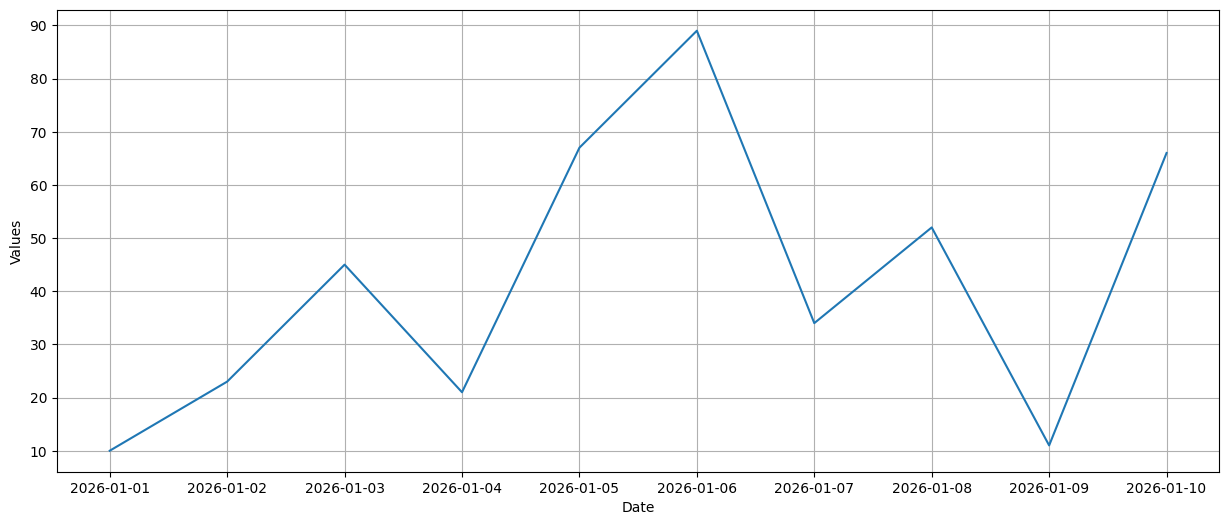

In [15]:
plt.figure(figsize=(15,6))
plt.plot(ts)
plt.xlabel('Date')
plt.ylabel('Values')
plt.grid()
plt.show()

In [16]:
import yfinance as yf 
data = yf.download('AAPL', start='2023-01-01', end='2023-06-30')
data.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2023-01-03,123.211212,128.954561,122.324586,128.343780,112117500
2023-01-04,124.482033,126.747853,123.221057,125.004155,89113600
2023-01-05,123.161957,125.871086,122.905826,125.240599,80962700
2023-01-06,127.693604,128.353644,123.033904,124.137262,87754700
2023-01-09,128.215698,131.427258,127.959568,128.530950,70790800


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 123 entries, 2023-01-03 to 2023-06-29
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   123 non-null    float64
 1   (High, AAPL)    123 non-null    float64
 2   (Low, AAPL)     123 non-null    float64
 3   (Open, AAPL)    123 non-null    float64
 4   (Volume, AAPL)  123 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 5.8 KB


In [18]:
data.columns

MultiIndex([( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])

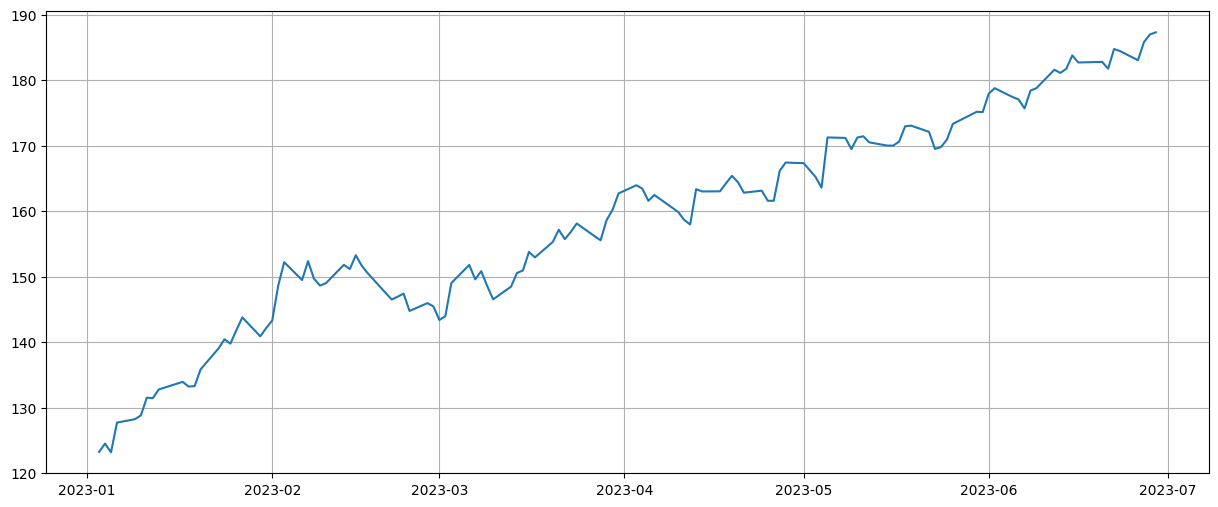

In [19]:
# plotting closing price

plt.figure(figsize=(15,6))
plt.plot(data.index, data['Close'], label='Closing Price')
plt.grid()
plt.show()

In [20]:
# daily returns

data['Daily Return'] = data['Close'].pct_change()
data['Daily Return']

Date
2023-01-03         NaN
2023-01-04    0.010314
2023-01-05   -0.010605
2023-01-06    0.036794
2023-01-09    0.004089
                ...   
2023-06-23   -0.001711
2023-06-26   -0.007553
2023-06-27    0.015059
2023-06-28    0.006328
2023-06-29    0.001797
Name: Daily Return, Length: 123, dtype: float64

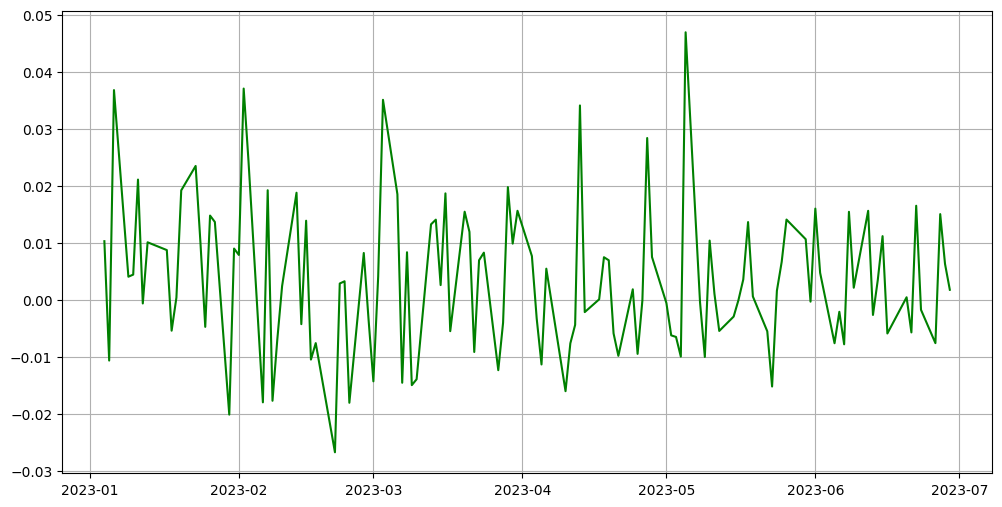

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Daily Return'], label='Daily Return', color='green')
plt.grid()
plt.show()

In [22]:
data["MA_50"] = data['Close'].rolling(window=50).mean()
print(data["MA_50"])
data["MA_200"] = data['Close'].rolling(window=200).mean()
print(data["MA_200"])

Date
2023-01-03           NaN
2023-01-04           NaN
2023-01-05           NaN
2023-01-06           NaN
2023-01-09           NaN
                 ...    
2023-06-23    172.098018
2023-06-26    172.492010
2023-06-27    172.948038
2023-06-28    173.427186
2023-06-29    173.888583
Name: MA_50, Length: 123, dtype: float64
Date
2023-01-03   NaN
2023-01-04   NaN
2023-01-05   NaN
2023-01-06   NaN
2023-01-09   NaN
              ..
2023-06-23   NaN
2023-06-26   NaN
2023-06-27   NaN
2023-06-28   NaN
2023-06-29   NaN
Name: MA_200, Length: 123, dtype: float64


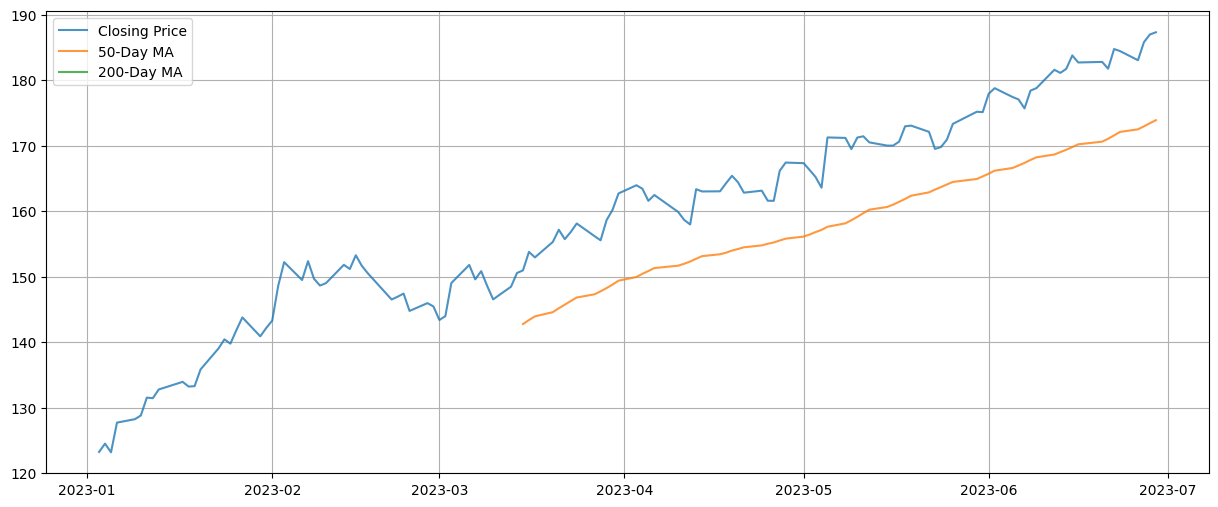

In [23]:
plt.figure(figsize=(15,6))
plt.plot(data['Close'], label='Closing Price', alpha=0.8)
plt.plot(data['MA_50'], label='50-Day MA', alpha=0.8)
plt.plot(data['MA_200'], label='200-Day MA', alpha=0.8)
plt.legend()
plt.grid()
plt.show()

In [24]:
data['Close'].describe()

Ticker,AAPL
count,123.000000
mean,158.505861
std,15.919185
min,123.161957
25%,148.519234
50%,158.652054
75%,170.767105
max,187.316208
